<a href="https://colab.research.google.com/github/Vamsi24-coder/Predictive_Analytics/blob/customer_churn_prediction/Customet_Chrun_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

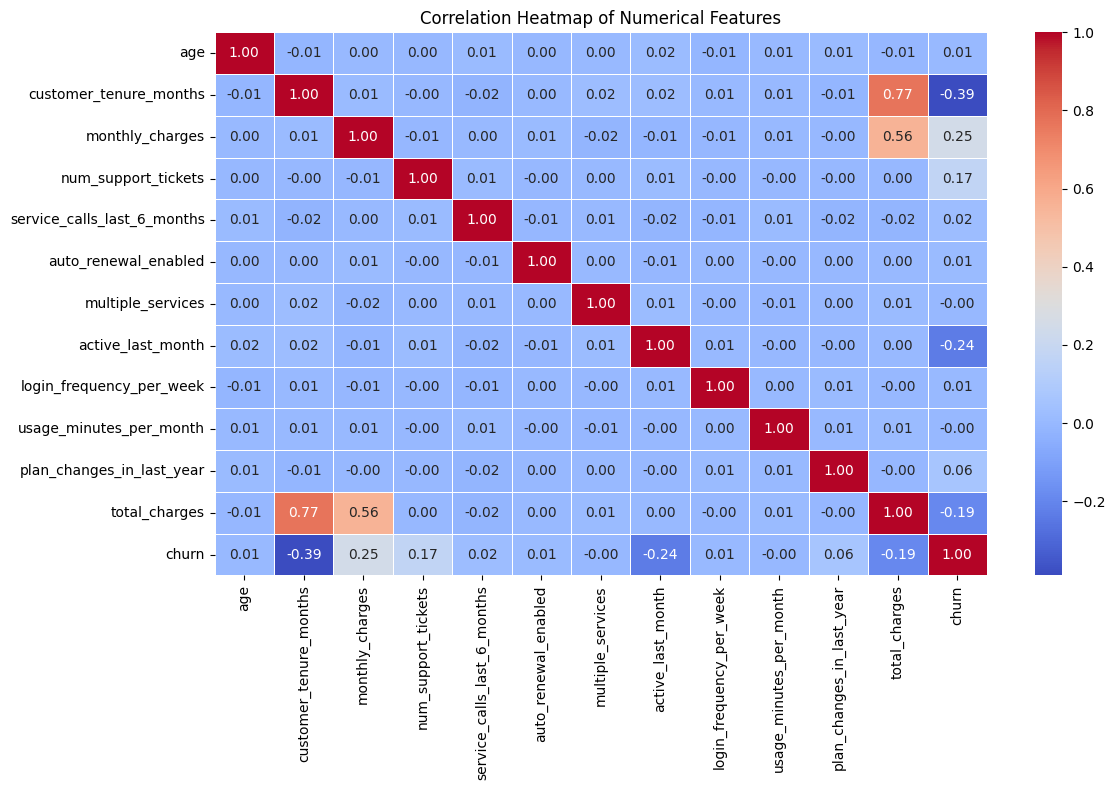

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('customer_churn_dataset.csv')

# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


/tmp/ipython-input-4-1147627322.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn', y='monthly_charges', palette='Set2')


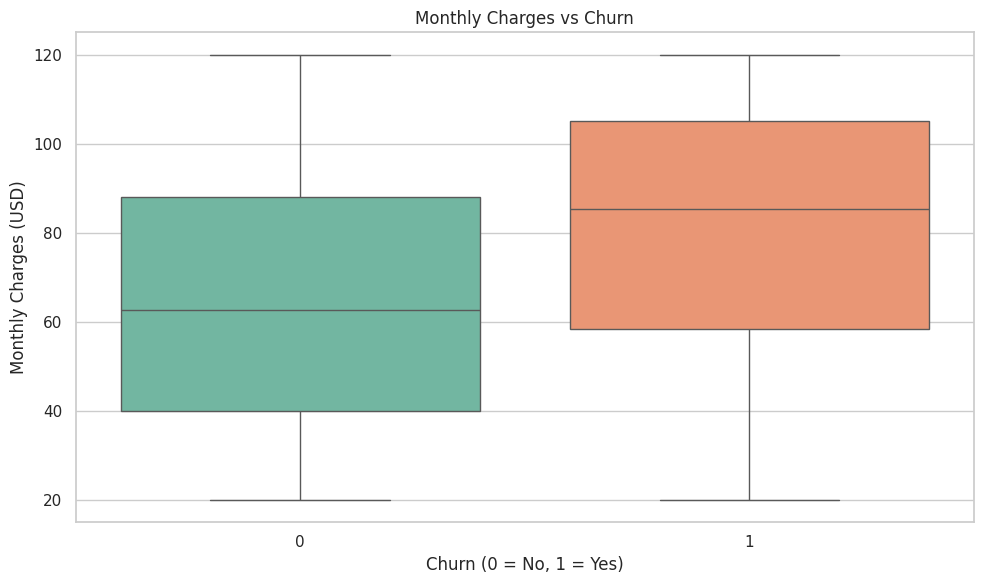

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('customer_churn_dataset.csv')

# Set seaborn style
sns.set(style="whitegrid")

# Box Plot: Monthly Charges vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='churn', y='monthly_charges', palette='Set2')
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Charges (USD)')
plt.tight_layout()
plt.show()


/tmp/ipython-input-5-2768928931.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn', y='customer_tenure_months', palette='Set3')


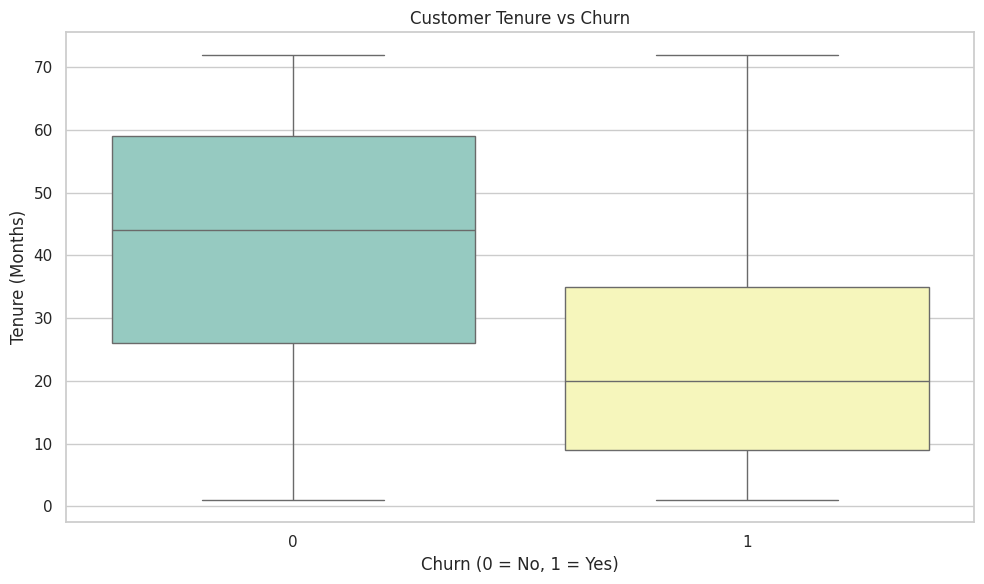

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='churn', y='customer_tenure_months', palette='Set3')
plt.title('Customer Tenure vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Tenure (Months)')
plt.tight_layout()
plt.show()


/tmp/ipython-input-6-2898145919.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn', y='usage_minutes_per_month', palette='coolwarm')


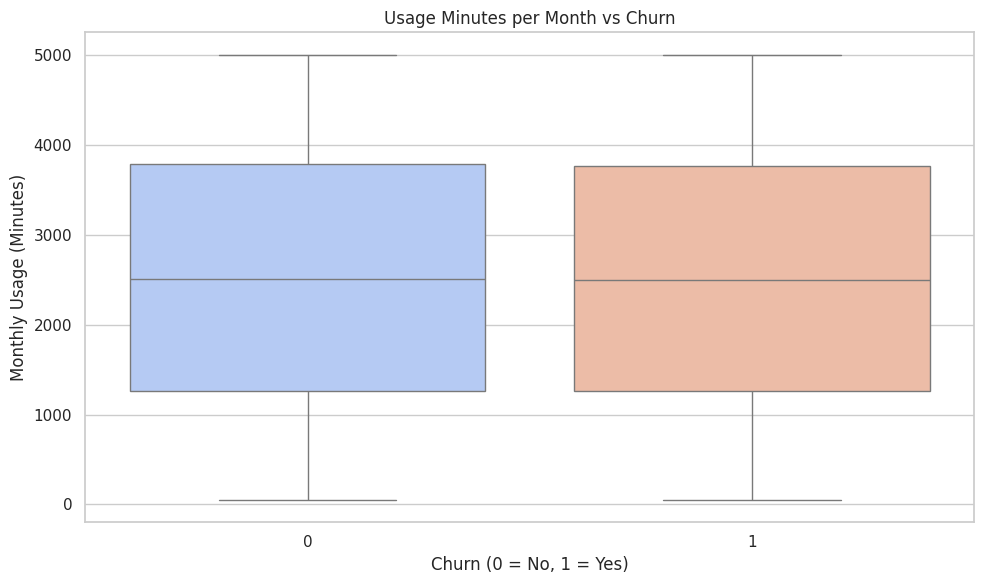

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='churn', y='usage_minutes_per_month', palette='coolwarm')
plt.title('Usage Minutes per Month vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Usage (Minutes)')
plt.tight_layout()
plt.show()


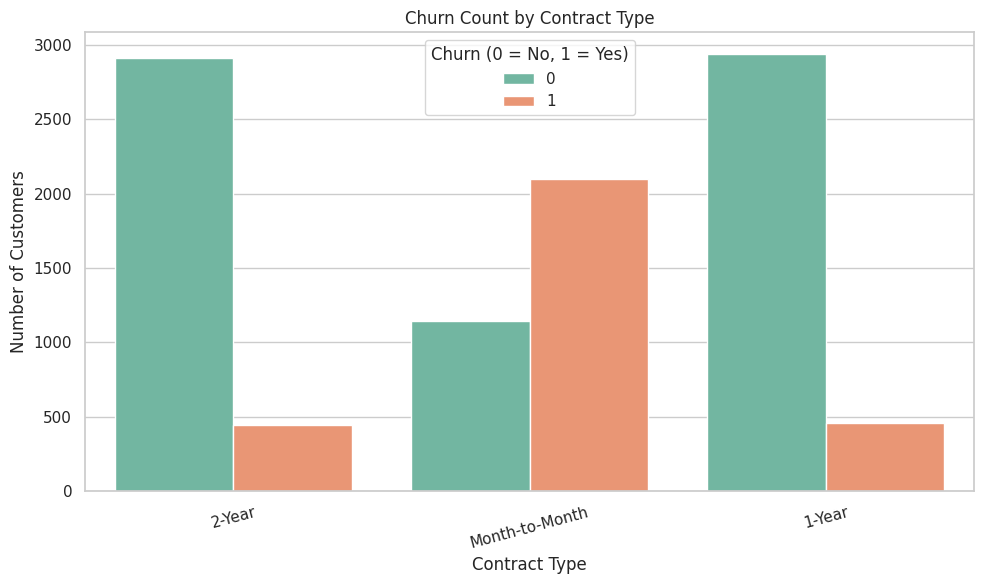

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('customer_churn_dataset.csv')

# Plot: Contract Type vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='contract_type', hue='churn', palette='Set2')
plt.title('Churn Count by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn (0 = No, 1 = Yes)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


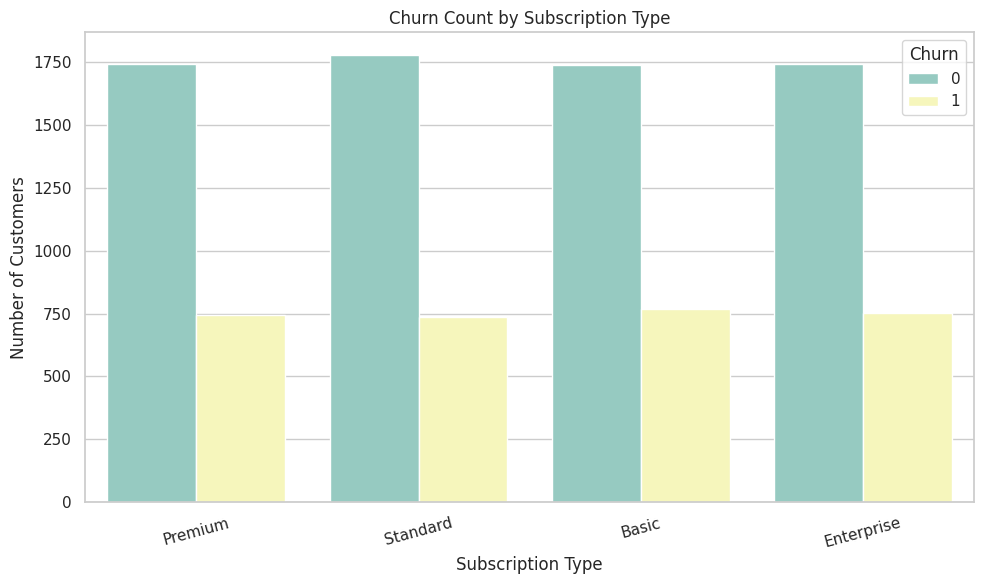

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='subscription_type', hue='churn', palette='Set3')
plt.title('Churn Count by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


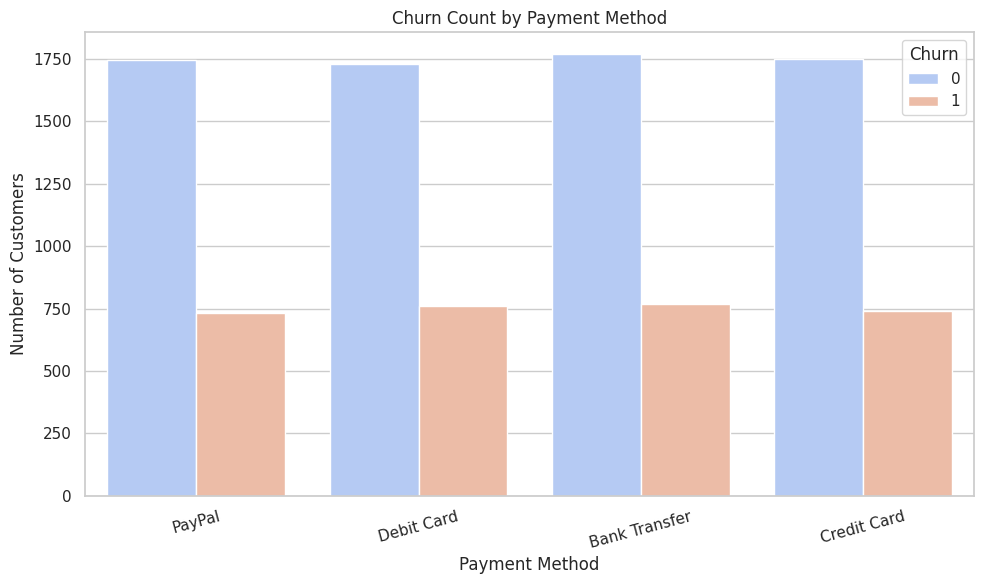

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='payment_method', hue='churn', palette='coolwarm')
plt.title('Churn Count by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


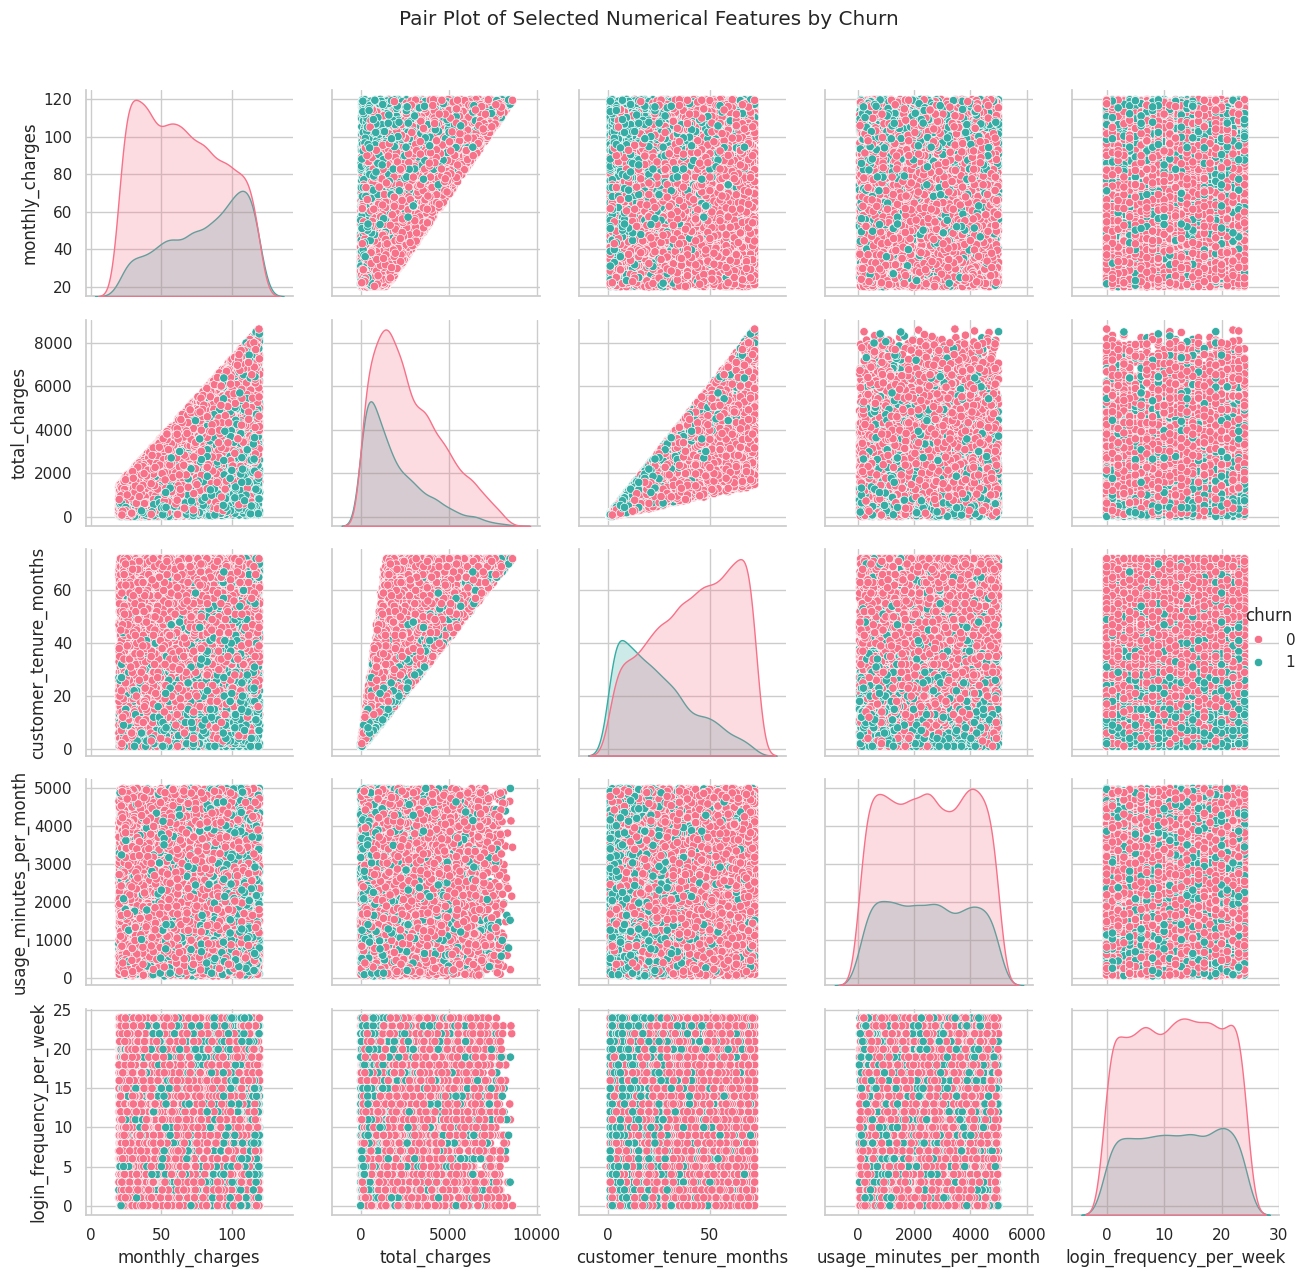

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('customer_churn_dataset.csv')

# Select key numerical features + target
selected_features = [
    'monthly_charges',
    'total_charges',
    'customer_tenure_months',
    'usage_minutes_per_month',
    'login_frequency_per_week',
    'churn'  # Target for hue
]

# Subset the data
pair_df = df[selected_features].dropna()

# Create the pair plot
sns.pairplot(pair_df, hue='churn', diag_kind='kde', palette='husl')
plt.suptitle('Pair Plot of Selected Numerical Features by Churn', y=1.02)
plt.tight_layout()
plt.show()


[0]	Validation-auc:0.95120
[50]	Validation-auc:0.97353
[100]	Validation-auc:0.97460
[150]	Validation-auc:0.97512
[200]	Validation-auc:0.97532
[250]	Validation-auc:0.97522
[251]	Validation-auc:0.97515


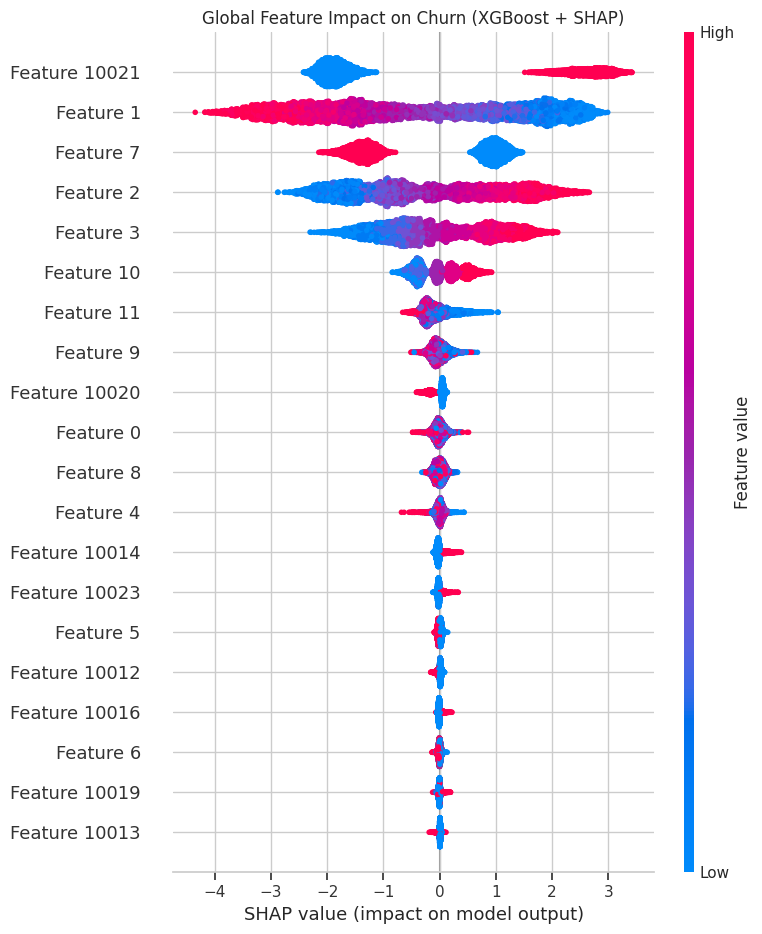

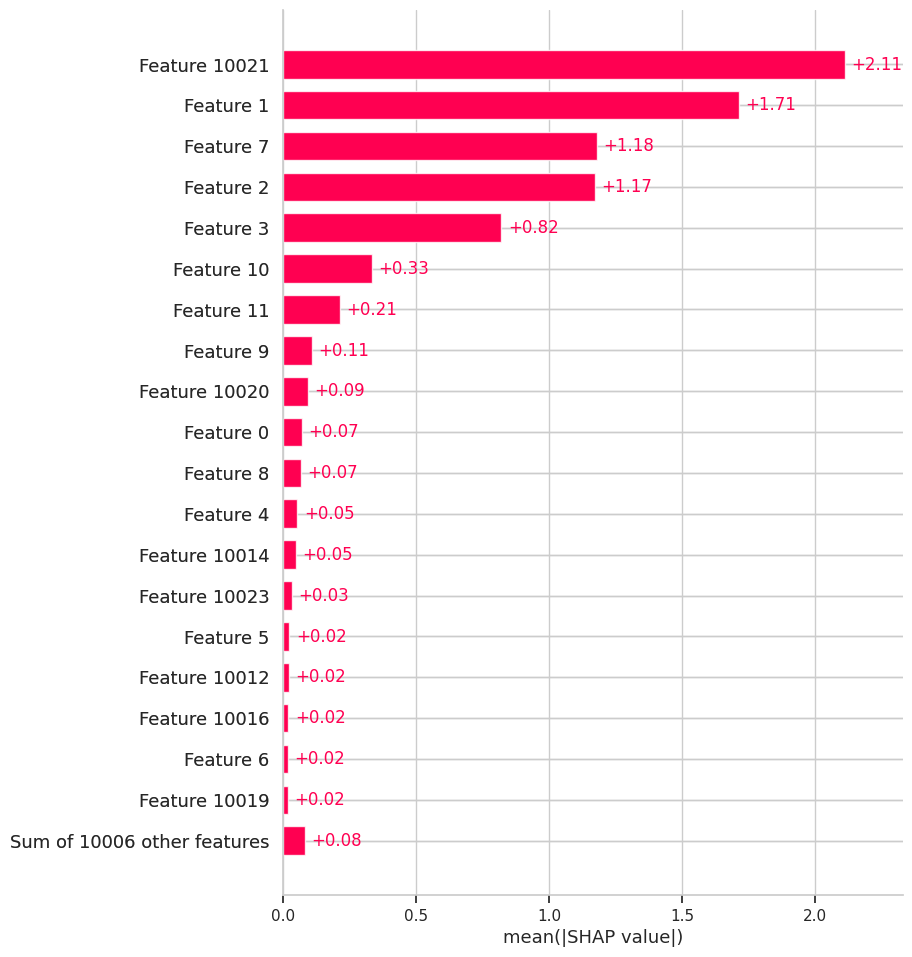

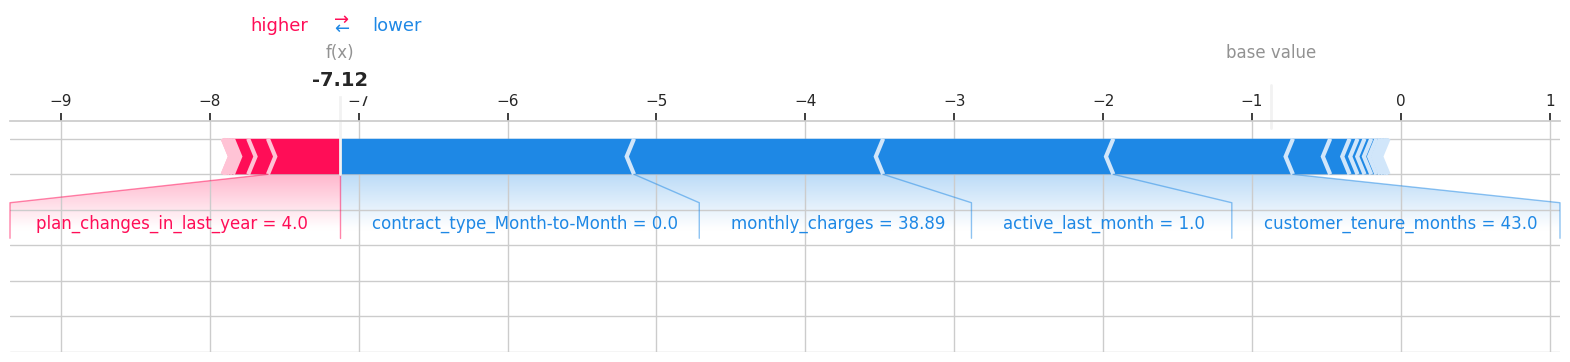

In [13]:
# ================================================================
# 0)  SET‑UP  ────────────────────────────────────────────────────
# ================================================================
!pip install -q xgboost==2.0.3 shap --upgrade

import os, warnings, pandas as pd, numpy as np, xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import shap, matplotlib.pyplot as plt
shap.initjs(); warnings.filterwarnings("ignore")

DATA_PATH = '/content/customer_churn_dataset.csv'  # adjust if needed
assert os.path.exists(DATA_PATH), f"{DATA_PATH} not found!"

# ================================================================
# 1)  LOAD & PREPARE DATA  ───────────────────────────────────────
# ================================================================
df  = pd.read_csv(DATA_PATH)

# one‑hot encode categoricals
df_enc = pd.get_dummies(df, drop_first=True)

# split features / target
X = df_enc.drop('churn', axis=1)
y = df_enc['churn']

# replace ±inf → NaN  then mean‑impute
X = X.replace([np.inf, -np.inf], np.nan)
X = SimpleImputer(strategy='mean').fit_transform(X)

# train/val split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ================================================================
# 2)  TRAIN XGBOOST ON THE GPU  ──────────────────────────────────
# ================================================================
params = {
    "objective":    "binary:logistic",
    "eval_metric":  "auc",
    "tree_method":  "gpu_hist",     # T4 GPU‑friendly
    "predictor":    "gpu_predictor",
    "learning_rate": 0.05,
    "max_depth":     6,
    "subsample":     0.8,
    "colsample_bytree": 0.8,
    "lambda":        1.0,
}

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest  = xgb.DMatrix(X_test,  label=y_test)

model = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    evals=[(dtest, "Validation")],
    early_stopping_rounds=40,
    verbose_eval=50,
)

# ================================================================
# 3)  SHAP EXPLANATIONS  ─────────────────────────────────────────
# ================================================================
# Build explainer (TreeExplainer auto‑detects GPU model)
explainer   = shap.TreeExplainer(model)
shap_values = explainer(X_train)   # returns a shap.Explanation object

# ---- 3a) Global summary (beeswarm) ----
plt.figure(figsize=(12,7))
shap.summary_plot(shap_values, X_train, show=False)
plt.title("Global Feature Impact on Churn (XGBoost + SHAP)")
plt.tight_layout()
plt.show()

# ---- 3b) Compact bar plot of top 20 ----
shap.plots.bar(shap_values, max_display=20)

# ================================================================
# 4)  LOCAL EXPLANATION (INTERACTIVE)  ───────────────────────────
# ================================================================
# Pick any row index from the training set to inspect
i = 0
shap.force_plot(
    explainer.expected_value,
    shap_values.values[i],
    pd.DataFrame(X_train, columns=df_enc.drop('churn', axis=1).columns).iloc[i, :],
    matplotlib=True  # use browser JS version by omitting this arg
)
